In [1]:
# required imports

#import xlrd
#import random
import pandas as pd
#import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')

<AxesSubplot:>

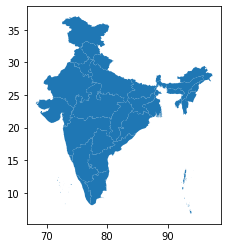

In [2]:
import geopandas as gpd
fp = "state/IndiaStates.shp"
map_df = gpd.read_file(fp)
map_df.plot()

In [3]:
map_df.st_nm

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

In [4]:
page = 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_fertility_rate'
table = 0
fertility_rate = pd.read_html(page)[table]

In [5]:
fertility_rate['State/UT']

0                 Kerala
1                 Sikkim
2                Manipur
3      Andaman & Nicobar
4                    Goa
5            Lakshadweep
6                  Delhi
7             Chandigarh
8                 Punjab
9            West Bengal
10             Puduchery
11      Himachal Pradesh
12        Andhra Pradesh
13     Jammu and Kashmir
14            Tamil Nadu
15               Tripura
16           Daman & Diu
17             Telangana
18             Karnataka
19           Maharashtra
20                Odisha
21           Uttarakhand
22     Arunachal Pradesh
23               Gujarat
24               Haryana
25                 India
26                 Assam
27    Dadra Nagar Haveli
28               Mizoram
29          Chhattisgarh
30             Jharkhand
31              Nagaland
32             Rajasthan
33        Madhya Pradesh
34             Meghalaya
35         Uttar Pradesh
36                 Bihar
Name: State/UT, dtype: object

In [6]:
print(fertility_rate.at[13,'State/UT'])
fertility_rate.at[13,'State/UT'] = 'Jammu & Kashmir'
print(fertility_rate.at[22,'State/UT'])
fertility_rate.at[22,'State/UT'] = 'Arunanchal Pradesh'
print(fertility_rate.at[3,'State/UT'])
fertility_rate.at[3,'State/UT'] = 'Andaman & Nicobar Island'
print(fertility_rate.at[27,'State/UT'])
fertility_rate.at[27,'State/UT'] = 'Dadara & Nagar Havelli'
print(fertility_rate.at[6,'State/UT'])
fertility_rate.at[6,'State/UT'] = 'NCT of Delhi'
#print(fertility_rate.at[22,'State/UT'])
#fertility_rate.at[22,'State/UT'] = 'Arunanchal Pradesh'

Jammu and Kashmir
Arunachal Pradesh
Andaman & Nicobar
Dadra Nagar Haveli
Delhi


In [7]:
merged = map_df.set_index('st_nm').join(fertility_rate.set_index('State/UT'))
merged.head()

,geometry,Rank,Fertility rate 1981[2],Fertility rate 1991[2],Fertility rate 1999[4],Fertility rate 2009 [2],Fertility rate 2017[5],Change (1981-99),Change (1999-16)
st_nm,,,,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",4,-,-,1.9,1.5,1.5,NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",23,-,-,-,2.7,2.1,NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",26,4.1,3.5,3.2,2.6,2.3,NaN,NaN
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",36,5.7,4.4,4.5,3.9,3.2,NaN,NaN
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",8,-,-,-,1.8,1.6,NaN,NaN


In [8]:
merged_clean = merged.fillna(0)
india_fr=fertility_rate[fertility_rate['State/UT']=='India']['Fertility rate 2017[5]'].values[0]
rfr=2.1

<AxesSubplot:title={'center':'Fertility Rate 2017'}, xlabel='Source: https://censusindia.gov.in/vital_statistics/SRS_Report_2017/ \n 10.%20Chap_3-Estimates%20of%20Fertility_Indicators-2017.pdf'>

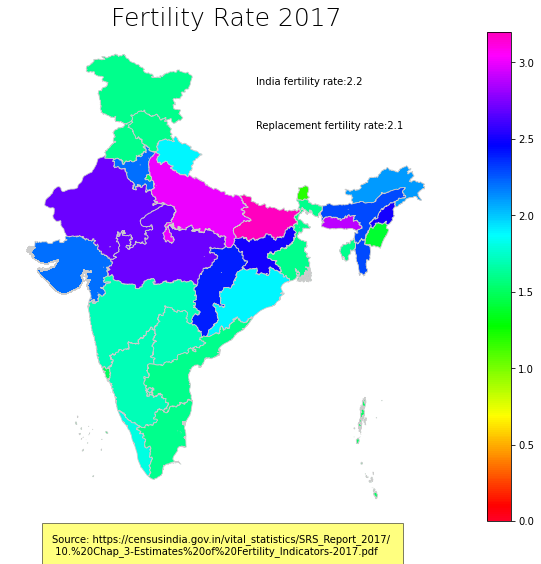

In [9]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('Fertility Rate 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})

source = 'Source: https://censusindia.gov.in/vital_statistics/SRS_Report_2017/ \n 10.%20Chap_3-Estimates%20of%20Fertility_Indicators-2017.pdf'
ax.text(85,35,'India fertility rate:'+str(india_fr))
ax.text(85,32,'Replacement fertility rate:'+str(rfr))
ax.text(70,3,source,bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})
ax.set_xlabel(source)
# plot the figure
merged_clean.plot(column='Fertility rate 2017[5]', cmap='gist_rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [10]:
page = 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_poverty_rate'
table=2
national_poverty_line = pd.read_html(page)[table]

In [11]:
national_poverty_line

,Rank,State/U.T.,Poverty (% of people below poverty line)[4]
0,1,Goa,5.090
1,2,Kerala,7.050
2,3,Himachal Pradesh,8.060
3,4,Sikkim,8.190
4,5,Punjab,8.260
5,6,Andhra Pradesh,9.200
6,U/T,Jammu and Kashmir and Ladakh,10.310
7,8,Haryana,11.160
8,9,Uttarakhand,11.260
9,10,Tamil Nadu,11.280


In [12]:
merged = map_df.set_index('st_nm').join(national_poverty_line.set_index('State/U.T.'))
merged.head()

,geometry,Rank,Poverty (% of people below poverty line)[4]
st_nm,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",22,31.98
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",24,33.74
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",U/T,21.81


In [13]:
merged_clean = merged.fillna(0)
india_poverty=national_poverty_line[national_poverty_line['State/U.T.']=='All India Average']['Poverty (% of people below poverty line)[4]'].values[0]
target_poverty=10

<AxesSubplot:title={'center':'Population Below National Poverty Line 2019'}, xlabel='Source: https://sdgindiaindex.niti.gov.in/#/ranking'>

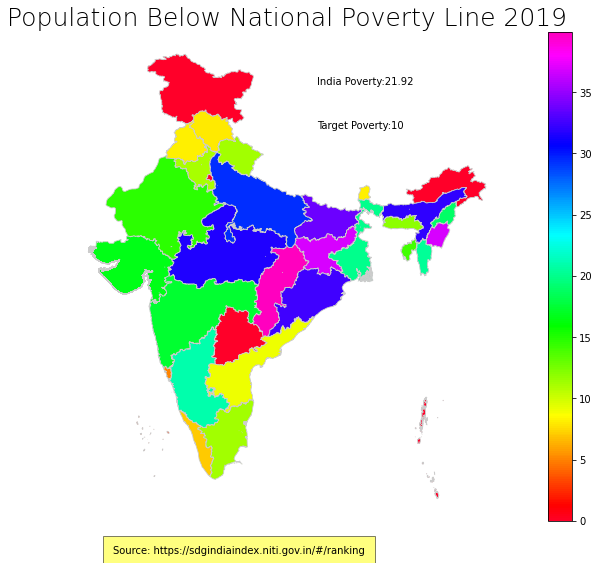

In [14]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
ax.set_title('Population Below National Poverty Line 2019', fontdict={'fontsize': '25', 'fontweight' : '3'})

source = 'Source: https://sdgindiaindex.niti.gov.in/#/ranking'
ax.text(85,35,'India Poverty:'+str(india_poverty))
ax.text(85,32,'Target Poverty:'+str(target_poverty))
ax.text(70,3,source,bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})
ax.set_xlabel(source)

# plot the figure
merged_clean.plot(column='Poverty (% of people below poverty line)[4]', cmap='gist_rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot:>

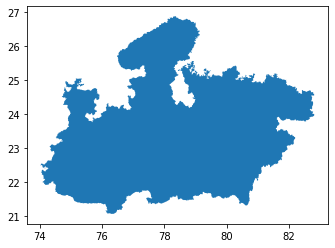

In [15]:
#map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
mp = map_df[map_df['st_nm']=='Madhya Pradesh']
mp.plot()

In [16]:
fp2 = "district/gadm36_IND_2.shp"
India = gpd.read_file(fp2)

In [ ]:
MP = India[India['NAME_1']=='Madhya Pradesh']
#print(MP.NAME_2)
MP.plot()

In [ ]:
JBP = India[India['NAME_2']=='Jabalpur']

In [ ]:
JBP.plot()

In [ ]:
!jupyter nbconvert --to html index.ipynb